## Pregunta 4

¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior?

## Abrir archivos

Antes de abrir los archivos usaremos pickle, como se vio en el modulo de Lectura_archivos, para trabajar con los datos ya procesados y proceder a la utilizacion de los mismos para responder a la pregunta de

###  ¿Qué comunas presentaron los mayores porcentajes de ingresos a la educación superior?

In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy as dcopy

In [2]:
carpeta = 'pkl-data'
archivo = "adm_lista.pkl"
ruta = os.path.join(carpeta, archivo)
with open(ruta, 'rb') as lectura:
    adm = pickle.load(lectura)

In [3]:
carpeta = 'pkl-data'
archivo = "datos_egresados.pkl"
ruta = os.path.join(carpeta, archivo)
with open(ruta, 'rb') as lectura:
    datos_egresado = pickle.load(lectura)

In [4]:
carpeta = 'pkl-data'
archivo = "comuna.pkl"
ruta = os.path.join(carpeta, archivo)
with open(ruta, 'rb') as lectura:
    comuna = pickle.load(lectura)


In [5]:
datos_adm = adm[14:len(adm)]

columna = ['ID_aux', 'CODIGO_REGION', 'CODIGO_COMUNA']
for df in range(len(datos_adm)):
    datos_adm[df] = datos_adm[df][columna]
    
datos_adm[1].head()


,ID_aux,CODIGO_REGION,CODIGO_COMUNA
0,id_0000900070019,14.0,14101.0
1,id_0000900270084,15.0,15101.0
2,id_0000900370016,5.0,5502.0
3,id_0000900370067,5.0,5502.0
4,id_0000900370092,5.0,5502.0


Con los archivos ya cargados usaremos la funcion pd.merge para fucionarlos a partir de la id

In [6]:
datos_final = []
for i in range((len(datos_adm))):
    datos_final.append(pd.merge(datos_adm[i] , datos_egresado[i], on = 'ID_aux', how='inner'))

datos_final[1].head() 

,ID_aux,CODIGO_REGION,CODIGO_COMUNA,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,POND_ANYO_ACAD,TIPO_MATRICULA
0,id_0000900370016,5.0,5502.0,26,26010,1,1,"588,55",1,1
1,id_0000900470020,13.0,13104.0,38,38292,1,1,"586,5",1,1
2,id_0000900970026,11.0,11101.0,48,48005,1,1,"638,3",1,1
3,id_0001900370153,7.0,7405.0,35,35001,1,1,"583,35",1,1
4,id_0001900470113,13.0,13301.0,53,53306,1,1,"438,4",2,1


In [7]:
datos_final[0]["CODIGO_COMUNA"].head()

0    14101
1     8110
2    13101
3    13401
4     7401
Name: CODIGO_COMUNA, dtype: int64

Ahora haremos una limpieza de los datos, eliminando columnas , para poder asi, calcular el porcentaje

In [8]:
cantidad_comuna = []
for i in datos_final:
    cantidad_datos = len(i)
    seriee = i["CODIGO_COMUNA"].value_counts().head(10)
    dff = seriee.reset_index()
    dff.columns = ['CODIGO_COMUNA', 'Cantidad']
    dff["Porcentaje"] = round((dff["Cantidad"] / cantidad_datos) * 100 , 3)
    cantidad_comuna.append((dff))
cantidad_comuna[0].head(10) 

,CODIGO_COMUNA,Cantidad,Porcentaje
0,13101,5509,5.441
1,13119,3178,3.139
2,9101,3163,3.124
3,13114,2862,2.827
4,8101,2861,2.826
5,13201,2774,2.740
6,13123,2771,2.737
7,13110,2480,2.450
8,2101,2270,2.242
9,5109,2257,2.229


Se modifica tambien el codigo de la columna, para poder remplazarlo por el nombre de la misma

In [9]:
comuna_c = dcopy(comuna)
comuna_c = comuna_c[14:len(comuna)]
renombre_comuna = dcopy(cantidad_comuna)
lista_final = []

df_10 = renombre_comuna[0]
df_look = comuna_c[0]
df_look = df_look[["COM", "COM_NOMBRE"]]
df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA" ]
df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad" , "Porcentaje"]])





for i in range(len(comuna_c) - 2):
    df_10 = renombre_comuna[i + 1]
    df_look = comuna_c[i + 1]
    df_look = df_look[["COD.COMUNA", "COM NOMBRE"]]
    df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA" , ]
    
    df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
    lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad" , "Porcentaje" ]])
    
lista_final[1].head()

,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,5282,5.090
1,13119.0,MAIPU,3364,3.242
2,9101.0,TEMUCO,3218,3.101
3,13114.0,LAS CONDES,2835,2.732
4,13201.0,PUENTE ALTO,2783,2.682


como se puede ver ya se tiene un dataframe capas de responder a la pregunta, ¿Que comuna presentaron los mayores porcentajues de ingreso a la educacion superior? esto a lo largo de los años 2018 a 204, notar tambien del gran alcance de estos años, puesto que en este rango de años fue, tanto el estallido social , como la pandemia, hitos importantes en todo ambito, incluyedo a la educacion, el como la pandemia afecto a la educacion chilena, entre otros

In [10]:
#en caso de desear ver el top 10 anual se cambia la variable datos_presentes
datos_presentes = 3
for i in range(len(lista_final)):
    print("Año :",2018 + i)
    display(lista_final[i].head(datos_presentes))

Año : 2018


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101,SANTIAGO,5509,5.441
1,13119,MAIPU,3178,3.139
2,9101,TEMUCO,3163,3.124


Año : 2019


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,5282,5.090
1,13119.0,MAIPU,3364,3.242
2,9101.0,TEMUCO,3218,3.101


Año : 2020


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,4926,5.027
1,13119.0,MAIPU,3252,3.319
2,9101.0,TEMUCO,3165,3.230


Año : 2021


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,4452,4.824
1,9101.0,TEMUCO,2747,2.977
2,13119.0,MAIPU,2719,2.946


Año : 2022


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,4452,4.640
1,13119.0,MAIPU,3015,3.143
2,9101.0,TEMUCO,2777,2.895


Año : 2023


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,4799,4.312
1,13119.0,MAIPU,3426,3.078
2,13201.0,PUENTE ALTO,3392,3.048


Año : 2024


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje
0,13101.0,SANTIAGO,4814,4.067
1,13119.0,MAIPU,3646,3.080
2,13201.0,PUENTE ALTO,3479,2.939


Archivo guardado


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad,Porcentaje,Año
0,13101.0,SANTIAGO,5509,5.441,2018
1,13119.0,MAIPU,3178,3.139,2018
2,9101.0,TEMUCO,3163,3.124,2018
3,13114.0,LAS CONDES,2862,2.827,2018
4,8101.0,CONCEPCION,2861,2.826,2018


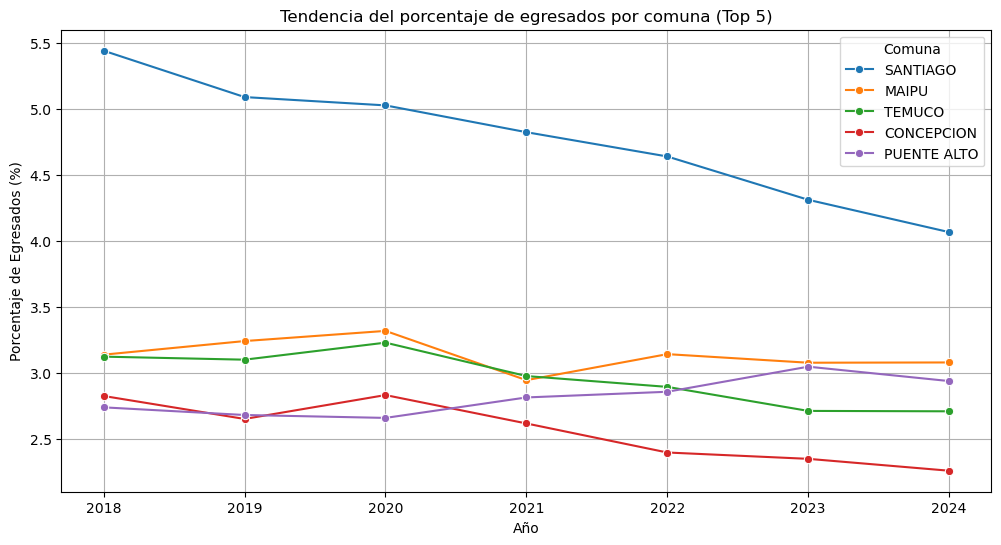

In [11]:
dfs_año = []
año_inicio = 2018

for i , df in enumerate(lista_final):
    df_temp = dcopy(df)
    df_temp["Año"] = año_inicio + i
    dfs_año.append(df_temp)

df_fusion = pd.concat(dfs_año , ignore_index=True)

df_fusion.to_csv("Resultados_años_comuna_preg4.csv" , index = False)

print("Archivo guardado") 
display(df_fusion.head())

top_comunas = df_fusion.groupby("NOMBRE_COMUNA")["Porcentaje"].max().sort_values(ascending=False).head(5).index.tolist()

df_grafico = df_fusion[df_fusion["NOMBRE_COMUNA"].isin(top_comunas)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grafico, x="Año", y="Porcentaje", hue="NOMBRE_COMUNA", marker="o")
plt.title("Tendencia del porcentaje de egresados por comuna (Top 5)")
plt.xlabel("Año")
plt.ylabel("Porcentaje de Egresados (%)")
plt.legend(title="Comuna")
plt.grid()
ruta = os.path.join("graficos-imagenes")
plt.savefig(os.path.join(ruta, "tendencia_egresados_pregunta4.png"))
plt.show()

## Conclusiones

se puede notar como las columnas , siempre reina como columna principal en santiago, comuna que a lo largo de los años a tenido un descenso en los años en cuanto a su porcentaje de egresados a la univerisdad, pasando de 5.4% a 4.0%, mientras que comunas como puente alto empiezan a asomarse , cosa que demuestra una tendencia del crecimiento de educacion como universidades/institutos para diversas comunas alejadas de santiago